<a href="https://colab.research.google.com/github/jmijo/2023_first/blob/main/%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C_%EC%86%A1%ED%8C%8C%EA%B5%AC_%EB%8C%80%EA%B8%B0%EC%98%A4%EC%97%BC%EB%8F%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EDA 및 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/서울시_3년_일별평균대기오염도.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54800 entries, 0 to 54799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          54800 non-null  int64  
 1   측정소명          54800 non-null  object 
 2   이산화질소농도(ppm)  54045 non-null  float64
 3   오존농도(ppm)     54211 non-null  float64
 4   일산화탄소농도(ppm)  54013 non-null  float64
 5   아황산가스농도(ppm)  54142 non-null  float64
 6   미세먼지농도(㎍/㎥)   53899 non-null  float64
 7   초미세먼지농도(㎍/㎥)  53920 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ MB


In [3]:
data_s = data[data['측정소명'] == '송파구']
data_s.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
10220,20220101,송파구,0.034,0.013,0.6,0.004,28.0,14.0
10221,20220102,송파구,0.036,0.008,0.5,0.003,32.0,22.0
10222,20220103,송파구,0.043,0.007,0.6,0.004,27.0,15.0
10223,20220104,송파구,0.032,0.013,0.6,0.004,35.0,20.0
10224,20220105,송파구,0.044,0.005,0.8,0.004,46.0,30.0


In [4]:
data_s.drop('측정소명', axis = 1, inplace = True)
data_s.drop('측정일시', axis = 1, inplace = True)
data_s.drop('미세먼지농도(㎍/㎥)', axis = 1, inplace = True)

<ipython-input-4-a074afa2dc0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s.drop('측정소명', axis = 1, inplace = True)
<ipython-input-4-a074afa2dc0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s.drop('측정일시', axis = 1, inplace = True)
<ipython-input-4-a074afa2dc0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s.drop('미세먼지농도(㎍/㎥)', axis = 1, inplace = True)


In [5]:
data_s.shape

(1096, 5)

In [6]:
data_s.columns = ['NO2', 'O3', 'CO','SO2','PM2.5']
data_s.columns

Index(['NO2', 'O3', 'CO', 'SO2', 'PM2.5'], dtype='object')

In [7]:
data_s.describe()

,NO2,O3,CO,SO2,PM2.5
count,1094.000000,1095.000000,1095.000000,1091.000000,1093.000000
mean,0.026175,0.025916,0.489498,0.002998,19.366880
std,0.012540,0.013351,0.159493,0.000760,11.951592
min,0.003000,0.002000,0.200000,0.001000,1.000000
25%,0.016000,0.016000,0.400000,0.002000,11.000000
50%,0.023000,0.025000,0.500000,0.003000,17.000000
75%,0.035000,0.036000,0.600000,0.003000,25.000000
max,0.068000,0.078000,1.100000,0.005000,90.000000


<Axes: ylabel='NO2'>

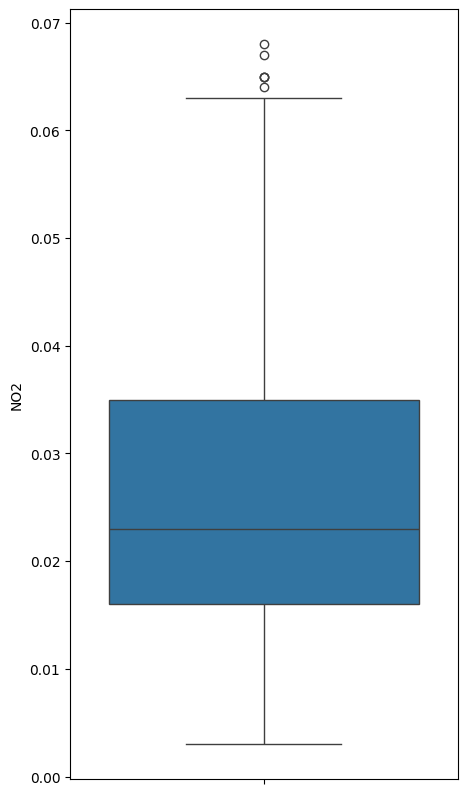

In [8]:
plt.figure(figsize = (5,10))
sns.boxplot(y = data_s['NO2'])

<Axes: ylabel='O3'>

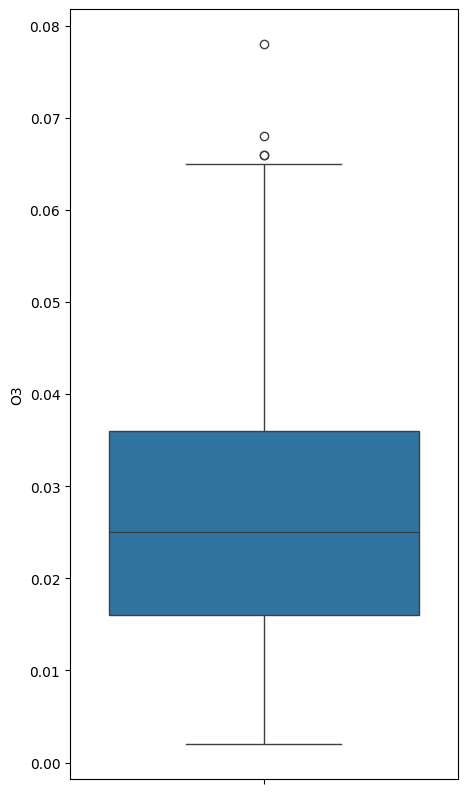

In [9]:
plt.figure(figsize = (5,10))
sns.boxplot(y = data_s['O3'])

<Axes: ylabel='CO'>

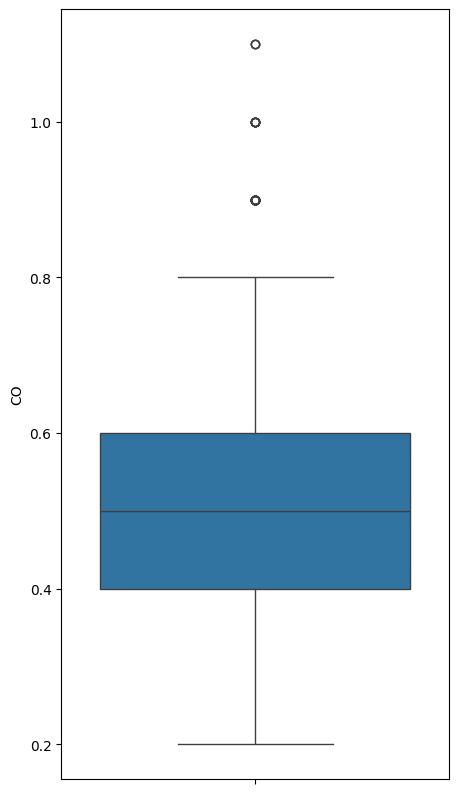

In [10]:
plt.figure(figsize = (5,10))
sns.boxplot(y = data_s['CO'])

<Axes: ylabel='SO2'>

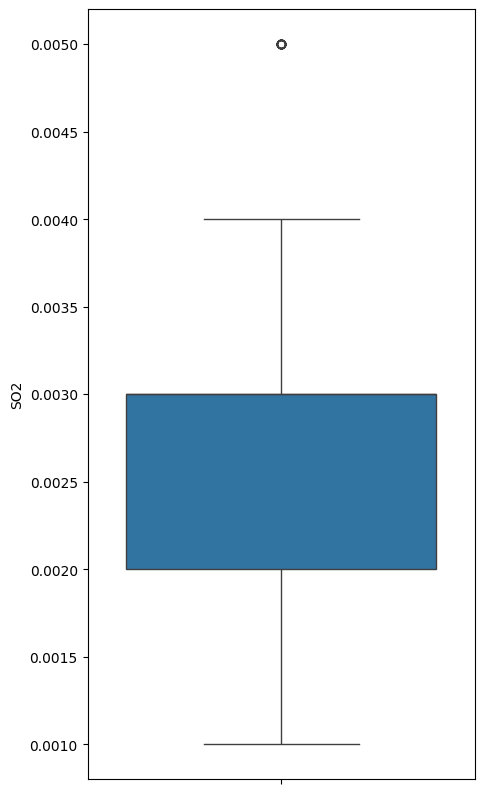

In [11]:
plt.figure(figsize = (5,10))
sns.boxplot(y = data_s['SO2'])

<Axes: ylabel='PM2.5'>

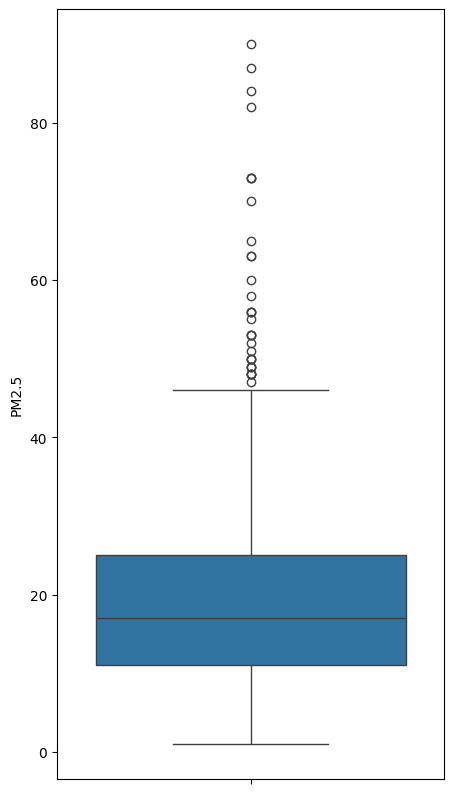

In [12]:
plt.figure(figsize = (5,10))
sns.boxplot(y = data_s['PM2.5'])

In [13]:
data_s.isnull().sum()

NO2      2
O3       1
CO       1
SO2      5
PM2.5    3
dtype: int64

In [14]:
data_s['NO2'] = data_s['NO2'].fillna(data_s['NO2'].median())
data_s['O3'] = data_s['O3'].fillna(data_s['O3'].median())
data_s['CO'] = data_s['CO'].fillna(data_s['CO'].median())
data_s['SO2'] = data_s['SO2'].fillna(data_s['SO2'].median())
data_s['PM2.5'] = data_s['PM2.5'].fillna(data_s['PM2.5'].median())

<ipython-input-14-89a0cbfb1e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['NO2'] = data_s['NO2'].fillna(data_s['NO2'].median())
<ipython-input-14-89a0cbfb1e2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['O3'] = data_s['O3'].fillna(data_s['O3'].median())
<ipython-input-14-89a0cbfb1e2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [15]:
data_s.isnull().sum()

NO2      0
O3       0
CO       0
SO2      0
PM2.5    0
dtype: int64

<Axes: >

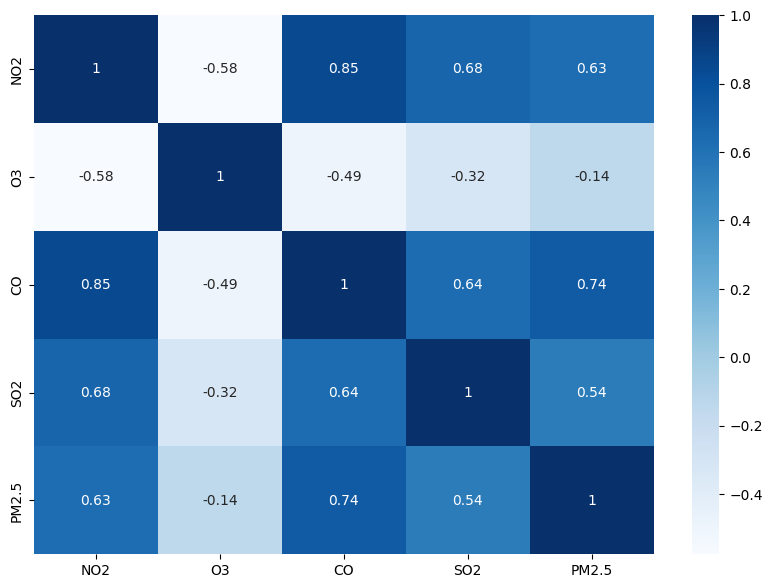

In [16]:
corr = data_s.corr()

plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True, cmap = 'Blues')

In [17]:
data_s.corr()

,NO2,O3,CO,SO2,PM2.5
NO2,1.000000,-0.576167,0.852030,0.677979,0.629249
O3,-0.576167,1.000000,-0.494283,-0.318492,-0.140855
CO,0.852030,-0.494283,1.000000,0.636501,0.740859
SO2,0.677979,-0.318492,0.636501,1.000000,0.538628
PM2.5,0.629249,-0.140855,0.740859,0.538628,1.000000


In [18]:
corr['PM2.5'].sort_values(ascending=False)

PM2.5    1.000000
CO       0.740859
NO2      0.629249
SO2      0.538628
O3      -0.140855
Name: PM2.5, dtype: float64